In [3]:
import pandas as pd

# Assuming the file is in the same directory as your Python script or notebook
file_path = 'creditworthiness.csv'

# Read the CSV file into a Pandas DataFrame
ccdefault_causal_df = pd.read_csv(file_path)
# Display the first few rows of the DataFrame
print(ccdefault_causal_df.head())


   ID  CC_LIMIT_CAT  EDUCATION  MARITAL_STATUS  GENDER  AGE_GROUP  \
0   1             0          2               2       2          0   
1   2             3          2               1       2          1   
2   3             2          2               1       2          1   
3   4             1          2               2       2          1   
4   5             1          2               2       1          0   

   pay_status_1  pay_status_2  pay_status_3  pay_status_4  ...  _tpm  _ppm  \
0             2             2            -1            -1  ...    -1    -1   
1            -1             2             0             0  ...    -1    -1   
2             0             0             0             0  ...    -1    -1   
3             0             0             0             0  ...    -1    -1   
4            -1             0            -1             0  ...    -1    -1   

   _RETAIL  _URBAN  _RURAL  _PREMIUM  _TREATMENT  _LTV  _CC_LIMIT  _risk_score  
0       -1      -1      -1        -

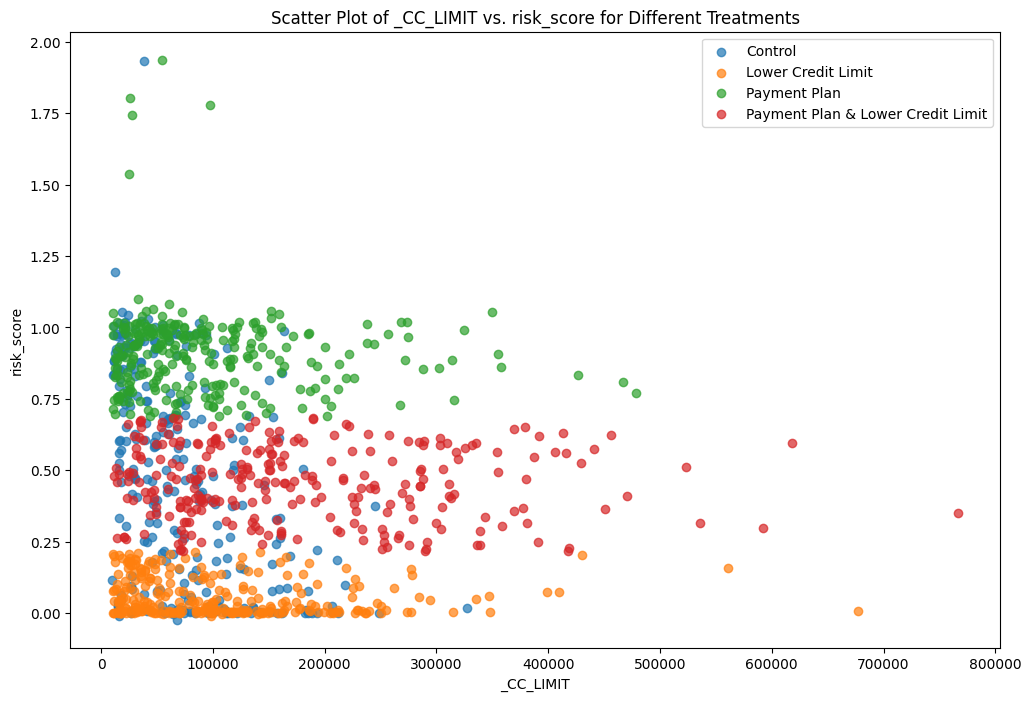

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample Data (replace this with your actual data loading)
# Assuming you have loaded the data into a DataFrame named 'ccdefault_causal_df'
# ccdefault_causal_df = pd.read_csv('your_data_file.csv')

# Define treatments and corresponding names
treatment_mapping = {
    0: 'Control',
    1: 'Lower Credit Limit',
    2: 'Payment Plan',
    3: 'Payment Plan & Lower Credit Limit'
}

# Plot _CC_LIMIT and risk_score against each other for different treatments
plt.figure(figsize=(12, 8))

for treatment, treatment_name in treatment_mapping.items():
    subset_df = ccdefault_causal_df[ccdefault_causal_df['_TREATMENT'] == treatment]
    plt.scatter(subset_df['_CC_LIMIT'], subset_df['_risk_score'], label=treatment_name, alpha=0.7)

plt.title('Scatter Plot of _CC_LIMIT vs. risk_score for Different Treatments')
plt.xlabel('_CC_LIMIT')
plt.ylabel('risk_score')
plt.legend()
plt.show()


In [5]:
pip install dowhy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.4/383.4 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.4/174.4 kB 7.6 MB/s eta 0:00:00


In [6]:
pip install econml xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 22.0 MB/s eta 0:00:00


In [7]:
import numpy as np
import pandas as pd
from econml.dr import LinearDRLearner
import xgboost as xgb

# Assuming ccdefault_causal_df is your DataFrame with the relevant columns

# Define variables
Y = '_LTV'
T = '_TREATMENT'
X = '_CC_LIMIT'
W = ['_spend', '_tpm', '_ppm', '_RETAIL', '_URBAN', '_RURAL', '_PREMIUM']

# Create a causal model using Deep Reinforcement Learning
drlearner = LinearDRLearner(
    model_regression=xgb.XGBRegressor(learning_rate=0.1),
    model_propensity=xgb.XGBClassifier(learning_rate=0.1, max_depth=2, objective="multi:softmax"),
    random_state=np.random.RandomState(seed=42)  # Set your desired random seed
)

# Train the model
# drlearner.fit(Y=ccdefault_causal_df[Y],
#               T=ccdefault_causal_df[T],
#               X=ccdefault_causal_df[[X]],
#               W=ccdefault_causal_df[W])


Y=ccdefault_causal_df[[Y]]
T=ccdefault_causal_df[[T]]
X=ccdefault_causal_df[[X]]
W=ccdefault_causal_df[W]


causal_mdl = drlearner.dowhy.fit(Y, T, X=X, W=W,
outcome_names=Y.columns.to_list(),
treatment_names=T.columns.to_list(),
feature_names=X.columns.to_list(),
confounder_names=W.columns.to_list(),
target_units=X.iloc[:550].values)

# causal_mdl = drlearner.dowhy.fit(Y, T, X=X, W=W,
#   outcome_names=Y.to_list(),
#   treatment_names=T.to_list(),
#   feature_names=X.to_list(),
#   confounder_names=W.to_list(),
#   target_units=X.iloc[:550].values)

identified_ate = causal_mdl.identified_estimand_
print(identified_ate)

drlearner_estimate = causal_mdl.estimate_
print(drlearner_estimate)




/usr/local/lib/python3.10/dist-packages/shap/utils/_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
/usr/local/lib/python3.10/dist-packages/shap/utils/_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def delta_minimization_order(all_masks, max_swap_size=100, num_

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                                                                       
─────────────(E[_LTV|_tpm,_ppm,_PREMIUM,_RETAIL,_URBAN,_CC_LIMIT,_RURAL,_spend
d[_TREATMENT]                                                                 

  
])
  
Estimand assumption 1, Unconfoundedness: If U→{_TREATMENT} and U→_LTV then P(_LTV|_TREATMENT,_tpm,_ppm,_PREMIUM,_RETAIL,_URBAN,_CC_LIMIT,_RURAL,_spend,U) = P(_LTV|_TREATMENT,_tpm,_ppm,_PREMIUM,_RETAIL,_URBAN,_CC_LIMIT,_RURAL,_spend)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                                                                       
─────────────(E[_LTV|_tpm,_ppm,_PREMIUM,_

In [8]:
# idxs = np.arange(0, causal_mdl._d_t[0]) # 3 TREATMENTS
# print("idxs\n",idxs)
idxs = [0,1,2]
print("idxs\n",idxs)
coefs = np.hstack([causal_mdl.coef_(T=i+1) for i in idxs])
print("coefs\n",coefs)
intercepts = np.hstack([causal_mdl.intercept_(T=i+1) for i in idxs])
print("intercepts\n",intercepts)

idxs
 [0, 1, 2]
coefs
 [-0.00239829  0.00144366  0.04024942]
intercepts
 [ 356.49917139 -413.47192037 1011.76072171]


In [10]:
cost_fn = lambda X: np.repeat(np.array([[0, 100, 100]]), X.shape[0], axis=0) +(np.repeat(np.array([[30, 0, 30]]), X.shape[0], axis=0) *
X._ppm.values.reshape(-1,1))

In [11]:
relevant_cols = causal_mdl.const_marginal_effect(X=X.values[:, :3])[:, :3]

# Perform the subtraction
treatment_effect_minus_costs = relevant_cols - cost_fn(ccdefault_causal_df)

# Add a column of zeros to the resulting array
treatment_effect_minus_costs = np.hstack([np.zeros((X.shape[0], 1)), treatment_effect_minus_costs])

# Find the index of the maximum value along axis 1
recommended_T = np.argmax(treatment_effect_minus_costs, axis=1)

In [12]:

print(treatment_effect_minus_costs)
print(recommended_T)

[[   0.         -257.8990526   256.50156968 -483.47336403]
 [   0.         -257.8990526   256.50156968 -483.47336403]
 [   0.         -257.8990526   256.50156968 -483.47336403]
 ...
 [   0.         -257.8990526   256.50156968 -483.47336403]
 [   0.         -257.8990526   256.50156968 -483.47336403]
 [   0.         -257.8990526   256.50156968 -483.47336403]]
[2 2 2 ... 2 2 2]


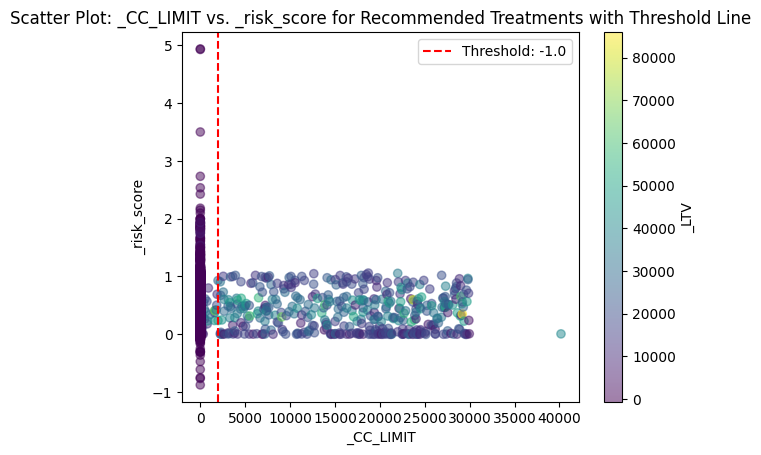

In [13]:
import matplotlib.pyplot as plt


# Extract the relevant columns for recommended treatments
recommended_data = ccdefault_causal_df[['ID', '_CC_LIMIT', '_risk_score', '_LTV']].values

# Filter data based on recommended treatments
selected_data = recommended_data[range(len(recommended_T)), recommended_T]

# Extract _CC_LIMIT, risk_score, and _LTV
_CC_LIMIT = selected_data
risk_score = recommended_data[:, 2]
_LTV = recommended_data[:, 3]

# Plotting
plt.scatter(_CC_LIMIT, risk_score, c=_LTV, cmap='viridis', marker='o', alpha=0.5)
plt.xlabel('_CC_LIMIT')
plt.ylabel('_risk_score')
plt.title('Scatter Plot: _CC_LIMIT vs. _risk_score for Recommended Treatments with Threshold Line')

# Adding a Threshold Line for reducing bank profit (_LTV)
threshold_value = 2000
plt.axvline(x=threshold_value, color='red', linestyle='--', label=f'Threshold: {_LTV[0]}')
plt.legend()

plt.colorbar(label='_LTV')
plt.show()


In [14]:
unprivileged_groups=[{'GENDER': 2}]
privileged_groups=[{'GENDER': 1}]


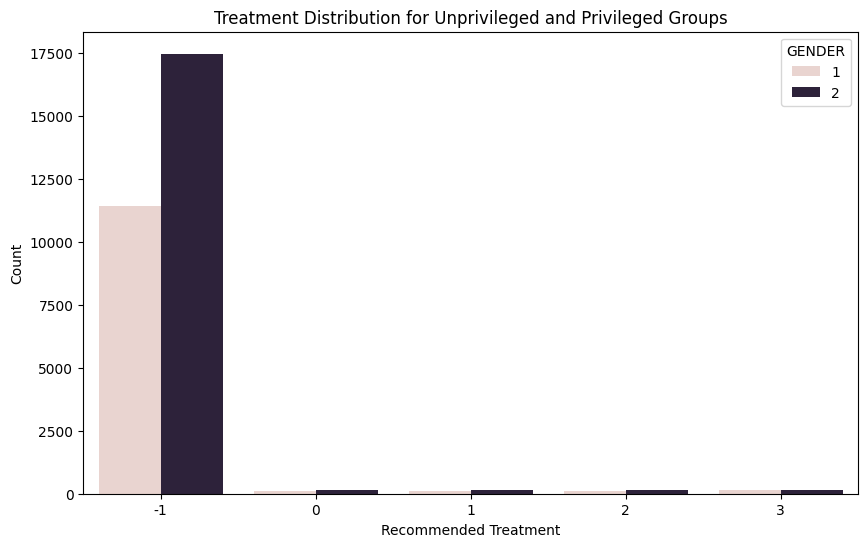

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns



# Filter data for unprivileged and privileged groups
unprivileged_data = ccdefault_causal_df[ccdefault_causal_df.isin(unprivileged_groups).all(axis=1)]
privileged_data = ccdefault_causal_df[ccdefault_causal_df.isin(privileged_groups).all(axis=1)]

# Plotting
plt.figure(figsize=(10, 6))
sns.countplot(x='_TREATMENT', data=ccdefault_causal_df, hue='GENDER')
plt.title('Treatment Distribution for Unprivileged and Privileged Groups')
plt.xlabel('Recommended Treatment')
plt.ylabel('Count')
plt.legend(title='GENDER')
plt.show()

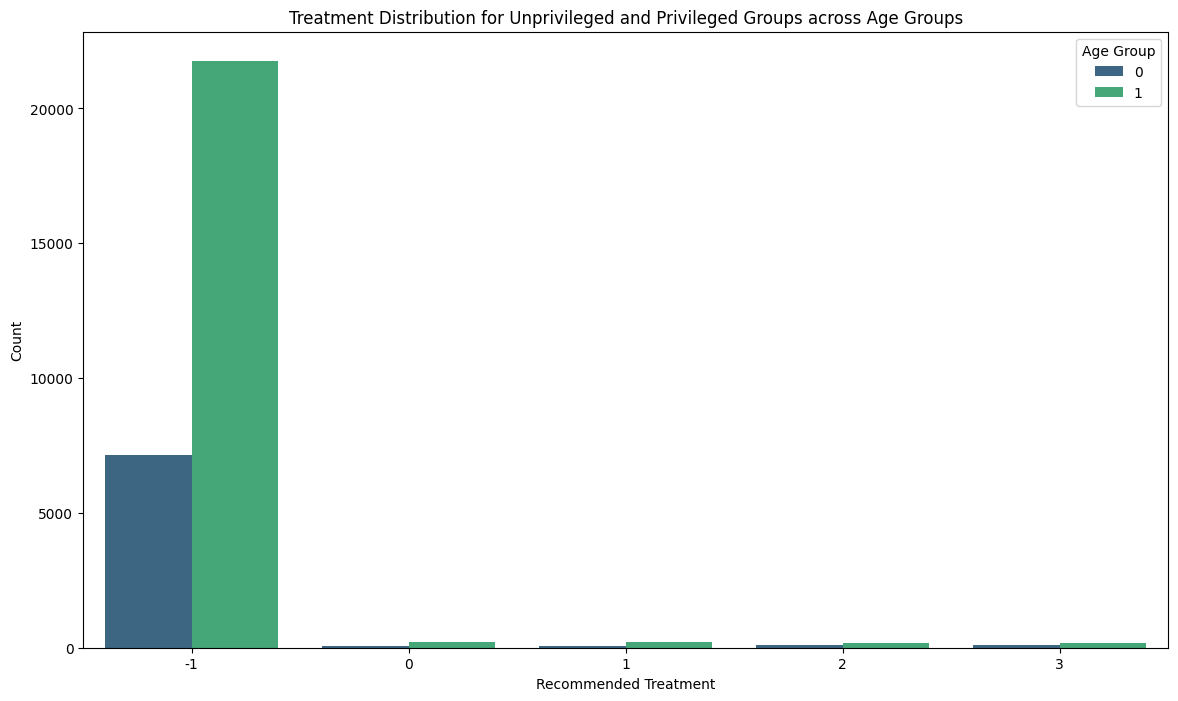

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns


# Filter data for unprivileged and privileged groups
unprivileged_data = ccdefault_causal_df[ccdefault_causal_df.isin(unprivileged_groups).all(axis=1)]
privileged_data = ccdefault_causal_df[ccdefault_causal_df.isin(privileged_groups).all(axis=1)]

# Plotting
plt.figure(figsize=(14, 8))
sns.countplot(x='_TREATMENT', data=ccdefault_causal_df, hue='AGE_GROUP', palette='viridis')
plt.title('Treatment Distribution for Unprivileged and Privileged Groups across Age Groups')
plt.xlabel('Recommended Treatment')
plt.ylabel('Count')
plt.legend(title='Age Group')
plt.show()

In [18]:
# Assuming you have already trained your causal model (drlearner)

# Refute the estimate using AGE_GROUP as a confounder
refute_age_group = causal_mdl.refute_estimate(method_name="random_common_cause", confounders_effect_on_treatment="binary_flip", confounders_effect_on_outcome="linear", effect_strength_on_treatment=0.2, effect_strength_on_outcome=0.2)

print("Refutation with AGE_GROUP as a confounder:\n", refute_age_group)


`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
`sparse` was renamed to `sparse_output` in version 1

Refutation with AGE_GROUP as a confounder:
 Refute: Add a random common cause
Estimated effect:809.3201230517254
New effect:1021.5001155544654
p value:0.15999999999999992



In [20]:
ref_placebo = causal_mdl.refute_estimate(\
method_name="placebo_treatment_refuter",\
placebo_type="permute", num_simulations=20)
print("ref_placebo\n",ref_placebo)


`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
`sparse` was renamed to `sparse_output` in version 1

ref_placebo
 Refute: Use a Placebo Treatment
Estimated effect:809.3201230517254
New effect:14.391434960799767
p value:0.49354128152739213



In [21]:
res_subset=causal_mdl.refute_estimate(method_name="data_subset_refuter", subset_fraction=0.9)
print("res_subset",res_subset)

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
`sparse` was renamed to `sparse_output` in version 1

res_subset Refute: Use a subset of data
Estimated effect:809.3201230517254
New effect:1035.0869153406657
p value:0.3999999999999999

